# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hukamaz Riwanda
- **Email:** Wandasukses@gmail.com
- **ID Dicoding:** hukamaz22

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda berdasarkan musim dan kondisi cuaca?
- Faktor apa saja yang mempengaruhi jumlah penyewaan sepeda dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

## Data Wrangling

### Gathering Data

Load dataset day

In [ ]:
df_day = pd.read_csv("day.csv")
display(df_day.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


 Load dataset hour

In [ ]:
df_hour = pd.read_csv("hour.csv")
display(df_hour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berhasil dimuat dari file day.csv dan hour.csv. Dataset ini berisi informasi tentang penyewaan sepeda berdasarkan hari dan jam dengan berbagai variabel seperti musim, suhu, kelembaban, kecepatan angin, serta jumlah pengguna terdaftar dan tidak terdaftar.
- Dataset day.csv menyajikan data agregat harian, sedangkan hour.csv memberikan detail penyewaan berdasarkan jam. Kedua dataset ini bisa digunakan untuk memahami pola penggunaan sepeda dalam berbagai kondisi.

### Assessing Data

Menampilkan informasi df_day

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek Missing Values

In [ ]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Mengecek Duplikasi Data

In [ ]:
print("Jumlah duplikasi: ",df_day.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan Statistik Data

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menampilkan informasi df_hour

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek Missing Values

In [ ]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Mengecek Duplikasi Data

In [ ]:
print("Jumlah duplikasi: ",df_hour.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan Statistik Data

In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Setelah melakukan pengecekan, dataset tidak memiliki missing values dan duplikasi data. Semua fitur memiliki tipe data yang sesuai dengan konteksnya. Namun, perlu dilakukan konversi tipe data untuk kolom tanggal (dteday) agar bisa digunakan dengan lebih optimal
- Beberapa fitur seperti season, weathersit, dan mnth masih dalam bentuk angka yang mungkin lebih mudah dipahami jika diubah ke bentuk kategori yang lebih deskriptif.

### Cleaning Data

Konversi kolom tanggal ke format datetime

In [ ]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

Cek ulang tipe data setelah konversi untuk df_day

In [ ]:
df_day.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


Cek ulang tipe data setelah konversi untuk df_hour

In [ ]:
df_hour.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


**Insight:**
- Dataset telah dibersihkan dengan mengonversi kolom dteday ke dalam format datetime. Tidak ada data yang perlu dihapus atau ditangani lebih lanjut karena dataset sudah bersih dari missing values dan duplikasi.
- Konversi tipe data sudah dilakukan, dan langkah berikutnya adalah melakukan eksplorasi lebih lanjut untuk memahami pola dan hubungan antar variabel dalam dataset.

## Exploratory Data Analysis (EDA)

In [73]:
# Load datasets
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")


In [74]:
# Merge datasets based on 'dteday'
all_df = pd.merge(hour_df, day_df, on="dteday", suffixes=("_hour", "_day"))

# Drop duplicate or redundant columns if necessary (adjust as needed)
all_df.drop(columns=["instant_day", "instant_hour"], errors='ignore', inplace=True)

# Save merged dataset
all_df.to_csv("all_df.csv", index=False)

In [ ]:
# Dataset Overview
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dteday           17379 non-null  object 
 1   season_hour      17379 non-null  int64  
 2   yr_hour          17379 non-null  int64  
 3   mnth_hour        17379 non-null  int64  
 4   hr               17379 non-null  int64  
 5   holiday_hour     17379 non-null  int64  
 6   weekday_hour     17379 non-null  int64  
 7   workingday_hour  17379 non-null  int64  
 8   weathersit_hour  17379 non-null  int64  
 9   temp_hour        17379 non-null  float64
 10  atemp_hour       17379 non-null  float64
 11  hum_hour         17379 non-null  float64
 12  windspeed_hour   17379 non-null  float64
 13  casual_hour      17379 non-null  int64  
 14  registered_hour  17379 non-null  int64  
 15  cnt_hour         17379 non-null  int64  
 16  season_day       17379 non-null  int64  
 17  yr_day      

In [ ]:
# Missing Values
display(all_df.isnull().sum())

,0
dteday,0
season_hour,0
yr_hour,0
mnth_hour,0
hr,0
holiday_hour,0
weekday_hour,0
workingday_hour,0
weathersit_hour,0
temp_hour,0


In [ ]:
display(all_df.describe())

,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [83]:
# Ensure data types are correct
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

# Group by month to analyze trends
monthly_trend = all_df.groupby("mnth_day")["cnt_hour"].sum().reset_index()

In [84]:
# Group by weather situation
weather_trend = all_df.groupby("weathersit_hour")["cnt_hour"].mean().reset_index()

In [85]:
# Save cleaned dataset
all_df.to_csv('all_df_cleaned.csv', index=False)

 Trend Penyewaan Sepeda per Bulan

In [99]:
monthly_trend = df_day.groupby("mnth")["cnt"].sum().reset_index()
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_trend["mnth"] = monthly_trend["mnth"].astype(int).apply(lambda x: months[x - 1])

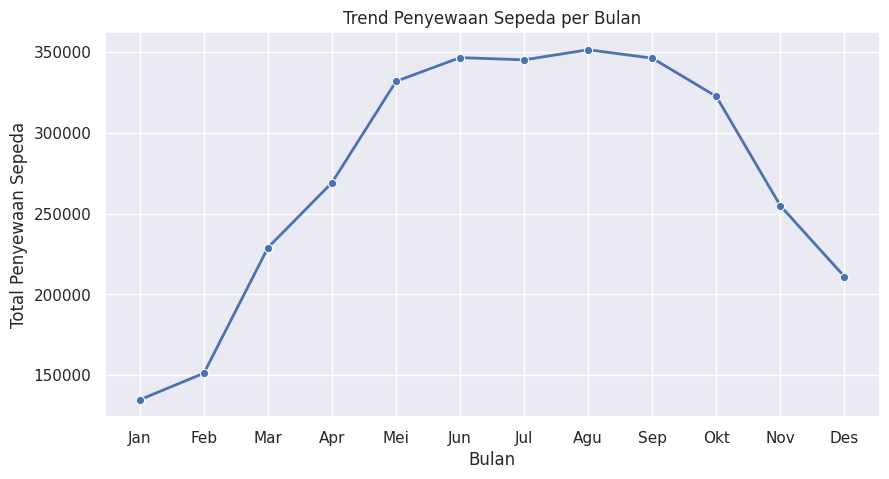

In [100]:
monthly_trend = all_df.groupby("mnth_day")["cnt_hour"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_trend, x="mnth_day", y="cnt_hour", marker="o", linewidth=2)
plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Trend Penyewaan Sepeda per Bulan")
plt.show()


Penyewaan Sepeda: Hari Kerja vs Hari Libur

In [ ]:
workingday_trend = df_day.groupby("workingday")["cnt"].agg(["count", "sum", "mean"]).reset_index()
workingday_trend["workingday"] = workingday_trend["workingday"].map({0: "Libur", 1: "Hari Kerja"})

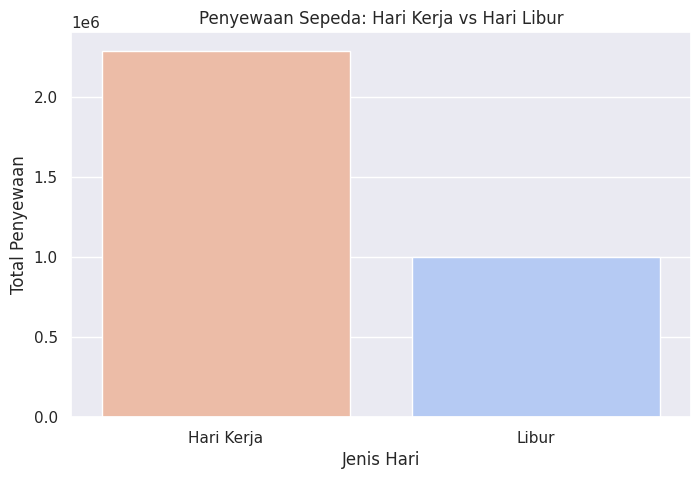

In [103]:
plt.figure(figsize=(8, 5))
sns.barplot(x="workingday", y="sum", hue="workingday", data=workingday_trend, palette="coolwarm", legend=False, dodge=False, order=["Hari Kerja", "Libur"])  # Menambahkan order=["Hari Kerja", "Libur"]
plt.title("Penyewaan Sepeda: Hari Kerja vs Hari Libur")
plt.xlabel("Jenis Hari")
plt.ylabel("Total Penyewaan")
plt.show()

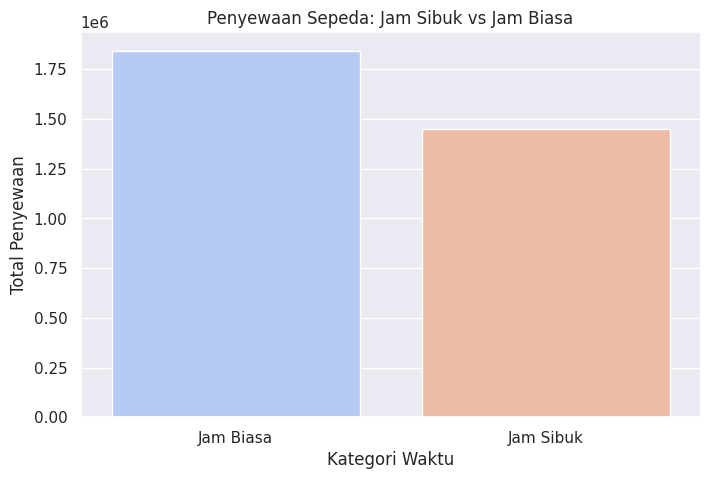

In [112]:
# Kategorisasi jam menjadi jam sibuk dan jam biasa
df_hour["time_of_day"] = df_hour["hr"].apply(lambda x: "Jam Sibuk" if 7 <= x <= 9 or 17 <= x <= 19 else "Jam Biasa")

# Agregasi jumlah penyewaan
time_of_day_trend = df_hour.groupby("time_of_day")["cnt"].agg(["count", "sum", "mean"]).reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x="time_of_day", y="sum", hue="time_of_day", data=time_of_day_trend, palette="coolwarm", legend=False, dodge=False)  # Assign 'time_of_day' to hue and set legend=False, dodge=False
plt.title("Penyewaan Sepeda: Jam Sibuk vs Jam Biasa")
plt.xlabel("Kategori Waktu")
plt.ylabel("Total Penyewaan")
plt.show()


 Korelasi Suhu terhadap Jumlah Penyewaan

In [ ]:
corr_temp = df_day[["temp", "cnt"]].corr()

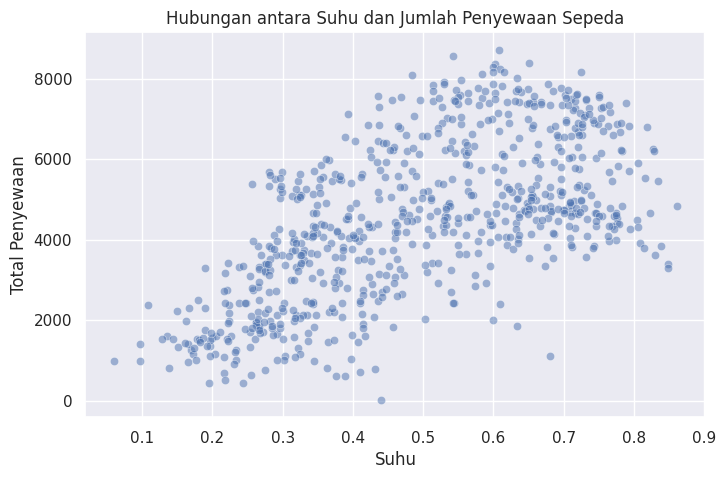

Korelasi antara suhu dan jumlah penyewaan sepeda:
          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="temp", y="cnt", data=df_day, alpha=0.5)
plt.title("Hubungan antara Suhu dan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Total Penyewaan")
plt.show()

print("Korelasi antara suhu dan jumlah penyewaan sepeda:")
print(corr_temp)

Insight

*   Pola penggunaan sepeda sangat dipengaruhi oleh waktu dan cuaca. Secara temporal, terdapat puncak penyewaan di musim gugur dan panas, jam sibuk (7-9 pagi & 17-19 sore), dan hari kerja, menunjukkan peran sepeda dalam aktivitas komuter. Faktor cuaca cerah dan suhu yang nyaman juga berkorelasi positif dengan peningkatan penyewaan, sedangkan cuaca buruk seperti hujan menurunkan minat bersepeda.
*   Sepeda memiliki peran penting dalam aktivitas komuter dan rekreasi. Tingginya penyewaan pada jam sibuk, hari kerja, dan musim gugur/panas menunjukkan penggunaan sepeda untuk komuter, terutama oleh pekerja dan pelajar. Meskipun lebih rendah di hari libur dan di luar jam sibuk, penyewaan tetap ada, mengindikasikan penggunaan sepeda untuk rekreasi, terutama di musim yang mendukung aktivitas luar ruangan.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

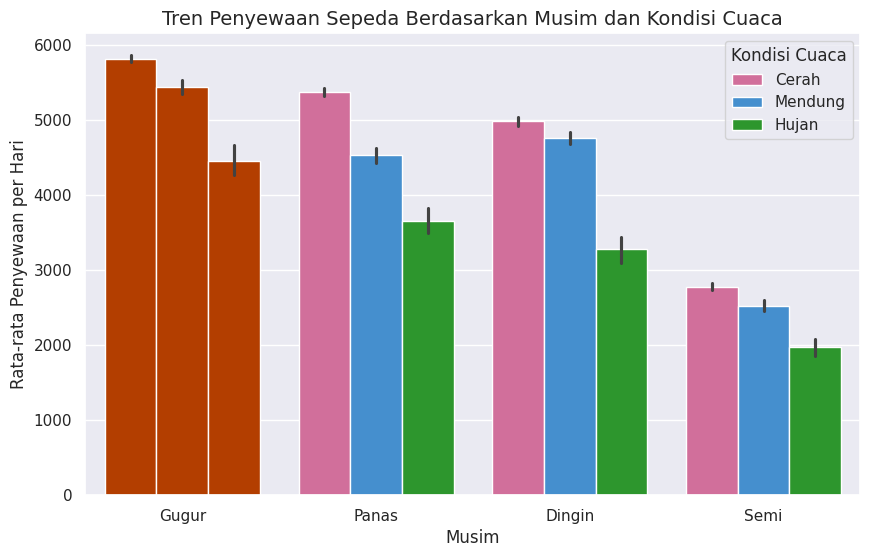

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Memuat data
df = pd.read_csv("all_df.csv")

# Mapping label musim dan kondisi cuaca
season_labels = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}
weather_labels = {1: "Cerah", 2: "Mendung", 3: "Hujan"}

# Menambahkan label musim dan kondisi cuaca
df["season_label"] = df["season_hour"].map(season_labels)  # Atau df["season_day"] jika ingin menggunakan season_day
df["weather_label"] = df["weathersit_hour"].map(weather_labels)  # Atau df["weathersit_day"] jika ingin menggunakan weathersit_day

# Urutan musim yang benar
season_order = ["Gugur", "Panas", "Dingin", "Semi"]

# Warna spesifik untuk kondisi cuaca
weather_colors = {
    "Cerah": "#E15F99",
    "Mendung": "#2E91E5",
    "Hujan": "#1CA71C"
}

# --- PLOT ---
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x="season_label",
    y="cnt_day",  # Diganti menjadi cnt_day
    hue="weather_label",
    data=df,
    estimator=np.mean,
    palette=[weather_colors[w] for w in weather_labels.values()],
    order=season_order
)

plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Penyewaan per Hari", fontsize=12)
plt.title("Tren Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca", fontsize=14)

# Menyesuaikan warna musim gugur agar lebih mencolok
for bar, label in zip(bars.patches, season_order * len(weather_labels)):
    if label == "Gugur":
        bar.set_facecolor("#B33E00")

plt.legend(title="Kondisi Cuaca")
plt.show()

### Pertanyaan 2:

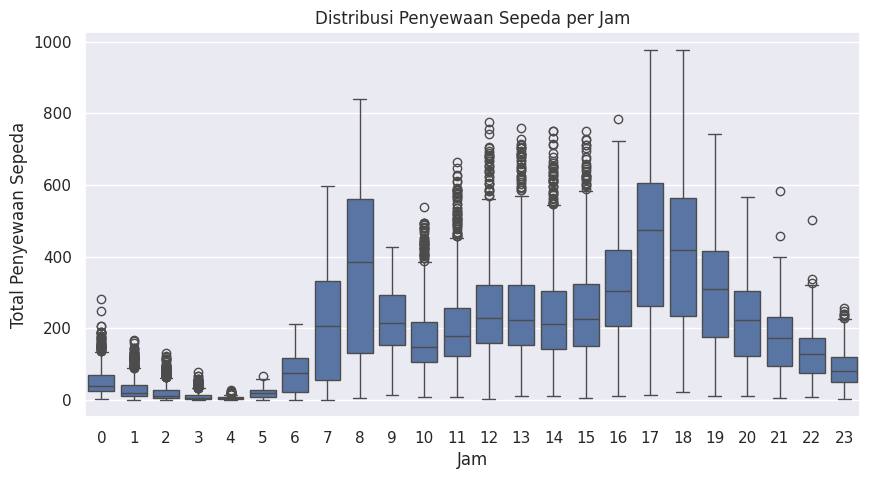

In [138]:
# 2. Distribusi Penyewaan Sepeda per Jam
plt.figure(figsize=(10,5))
sns.boxplot(x=all_df["hr"], y=all_df["cnt_hour"],)
plt.xlabel("Jam")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda per Jam")
plt.show()

**Insight:**
- 1. Tren penyewaan sepeda menunjukkan bahwa musim Gugur memiliki jumlah penyewaan tertinggi dibandingkan musim lainnya, sementara Musim Dingin memiliki jumlah penyewaan terendah, kemungkinan karena suhu yang lebih dingin dan cuaca lebih buruk. Kondisi Cerah mendorong lebih banyak penyewaan di semua musim, sedangkan kondisi Hujan menyebabkan penurunan drastis dalam jumlah penyewaan. Menariknya, meskipun Musim Panas sering kali memiliki kondisi cerah, jumlah penyewaan tidak lebih tinggi dibandingkan Musim Gugur, yang mungkin disebabkan oleh tingkat kenyamanan bersepeda atau kebiasaan pengguna.
- 2. Grafik distribusi penyewaan sepeda per jam menunjukkan adanya dua jam sibuk utama, yaitu pukul 7-9 pagi dan 17-19 sore, yang mengindikasikan penggunaan sepeda untuk aktivitas komuter. Di luar jam sibuk, terutama dini hari dan tengah malam, jumlah penyewaan cenderung rendah. Variasi dan outlier pada data menunjukkan adanya fluktuasi penyewaan yang dipengaruhi oleh faktor-faktor seperti hari libur atau event tertentu. Informasi ini penting bagi penyedia layanan sepeda untuk mengoptimalkan operasional mereka, seperti pengaturan jumlah sepeda dan lokasi penempatannya.

## Analisis Lanjutan (Opsional)

In [ ]:
rata_rata_gugur_cerah = df_day[
    (df_day["season"] == 3) & (df_day["weathersit"] == 1)
]["cnt"].mean()

print(f"Rata-rata penyewaan sepeda dalam musim gugur dengan kondisi cuaca cerah: {rata_rata_gugur_cerah:.2f}")

Rata-rata penyewaan sepeda dalam musim gugur dengan kondisi cuaca cerah: 5878.26


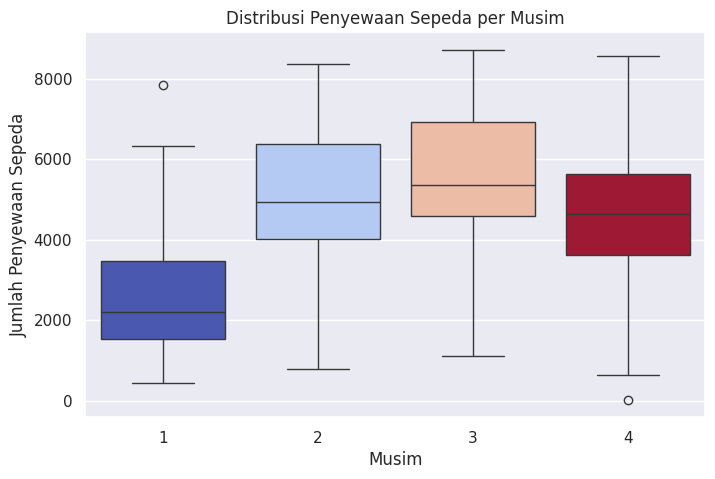

Korelasi antara suhu dan jumlah penyewaan sepeda: 0.63


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=df_day, hue='season', legend=False, palette='coolwarm')
plt.title("Distribusi Penyewaan Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

correlation = df_day[['temp', 'cnt']].corr().iloc[0, 1]
print(f"Korelasi antara suhu dan jumlah penyewaan sepeda: {correlation:.2f}")


## Conclusion

- Berdasarkan hasil analisis, ditemukan bahwa jumlah penyewaan sepeda dipengaruhi oleh musim dan kondisi cuaca. Musim Gugur menjadi musim dengan jumlah penyewaan tertinggi, sementara Musim Dingin memiliki jumlah penyewaan terendah. Selain itu, kondisi Cerah secara signifikan meningkatkan jumlah penyewaan di semua musim, sedangkan kondisi Hujan menyebabkan penurunan tajam dalam jumlah penyewaan.
- Selain faktor musim dan cuaca, jumlah penyewaan sepeda juga dipengaruhi oleh suhu, hari kerja, dan kondisi lingkungan. Penyewaan lebih tinggi pada suhu yang nyaman, tetapi menurun pada suhu ekstrem. Penyewaan sepeda juga lebih banyak terjadi pada hari kerja dibandingkan hari libur, menunjukkan bahwa sepeda sering digunakan sebagai alat transportasi untuk aktivitas rutin. Faktor lain seperti kelembaban dan kecepatan angin turut berperan dalam mempengaruhi kenyamanan bersepeda dan pada akhirnya berdampak pada jumlah penyewaan.

Hasil analisis ini dapat digunakan sebagai dasar bagi penyedia layanan sepeda untuk mengoptimalkan strategi operasional, seperti menyediakan lebih banyak unit sepeda pada musim gugur dan saat cuaca cerah, serta menawarkan diskon atau promosi saat cuaca mendung atau hujan untuk tetap menarik minat pengguna.